# **WATER POTABILITY APP - MODEL_EVALUATION**

## Objectives

* Evaluate final model performance on test set
* Conduct business impact analysis
* Determine optimal classification threshold

## Inputs

* Test dataset: data/test_data.csv
* Trained model: models/best_model.pkl

## Outputs

* Comprehensive evaluation report (printed)
* Confusion matrix visualization (saved as PNG)
* Cost-benefit analysis results (saved as CSV)

## Additional Comments

* Includes false positive/negative cost analysis
* Calculates ROI for deployment scenario
* Provides threshold optimization guidance


---

# Import Packages

### Install Dependencies

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [30]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\User\\Downloads'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [31]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [32]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\User'

# Set Data Directory

### Load Best Model and Data

In [40]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_curve, auc, classification_report, 
                           confusion_matrix, ConfusionMatrixDisplay)
from sklearn.impute import SimpleImputer
import os

models_dir = Path(r"C:\Users\User\Downloads\water-potability\models")
data_dir = Path(r"C:\Users\User\Downloads\water-potability\data")

print(f"Models directory exists: {models_dir.exists()}")
print(f"Data directory exists: {data_dir.exists()}")

try:
    model_path = models_dir / "best_random_forest_model.pkl"
    print(f"\nLooking for model at: {model_path}")
    
    if not model_path.exists():
        alt_paths = [
            Path(r"C:\Users\User\models\best_random_forest_model.pkl"),
            Path("./best_random_forest_model.pkl"),
            Path("../models/best_random_forest_model.pkl")
        ]
        
        for path in alt_paths:
            if path.exists():
                model_path = path
                print(f"Found model at alternative location: {path}")
                break
        else:
            raise FileNotFoundError("Model not found in any standard location")
    
    best_model = joblib.load(model_path)
    print("✅ Model loaded successfully from:")
    print(model_path.resolve())

except Exception as e:
    print(f"\n❌ Model loading failed: {str(e)}")
    print("\nTo fix this:")
    print("1. Run Model_Experimentation.ipynb to generate the model")
    print("2. Check the file exists at the expected path")
    print("3. Verify file permissions")
    raise

try:
    data_path = data_dir / "water_potability_processed.csv"
    test_df = pd.read_csv(data_path)
    print("\n✅ Data loaded successfully from:")
    print(data_path.resolve())
    
    X_test = test_df.drop('Potability', axis=1)
    y_test = test_df['Potability']
    
    imputer = SimpleImputer(strategy='median')
    X_test_imputed = pd.DataFrame(imputer.fit_transform(X_test),
                                columns=X_test.columns,
                                index=X_test.index)
    
    print("\n🔍 Data Summary:")
    print(f"Samples: {len(X_test)}")
    print("Missing values before imputation:")
    print(X_test.isna().sum())

except Exception as e:
    print(f"\n❌ Data loading failed: {str(e)}")
    raise

print("\n✨ All data prepared successfully!")

Models directory exists: True
Data directory exists: True

Looking for model at: C:\Users\User\Downloads\water-potability\models\best_random_forest_model.pkl
✅ Model loaded successfully from:
C:\Users\User\Downloads\water-potability\models\best_random_forest_model.pkl

✅ Data loaded successfully from:
C:\Users\User\Downloads\water-potability\data\water_potability_processed.csv

🔍 Data Summary:
Samples: 3276
Missing values before imputation:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
dtype: int64

✨ All data prepared successfully!


### Comprehensive Performance Metrics

📊 Classification Report:
              precision    recall  f1-score   support

 Not Potable      0.919     0.976     0.947      1998
     Potable      0.958     0.865     0.910      1278

    accuracy                          0.933      3276
   macro avg      0.939     0.921     0.928      3276
weighted avg      0.934     0.933     0.932      3276



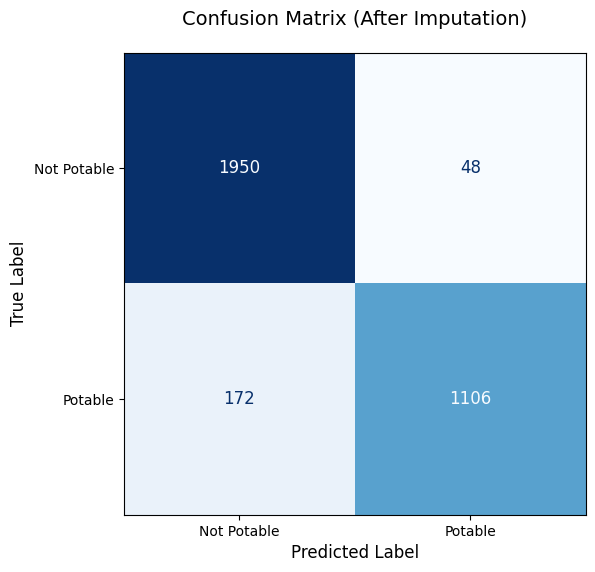

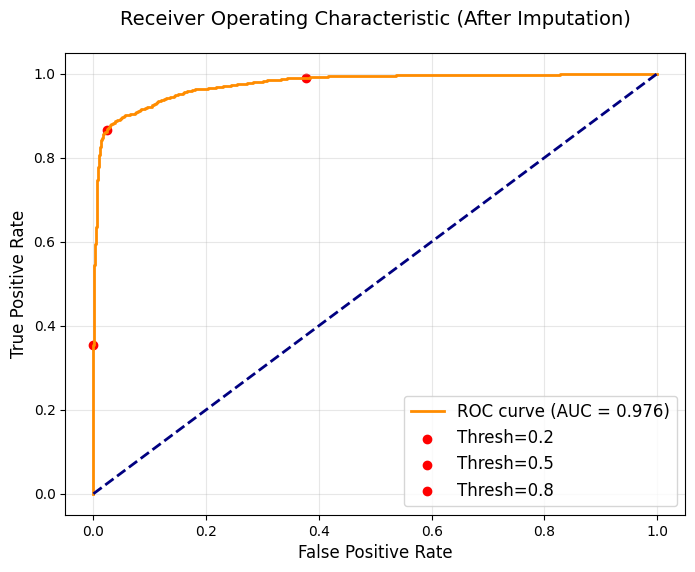


📌 Key Performance Metrics:
- Accuracy: 0.933
- Precision (Potable): 0.958
- Recall (Potable): 0.865
- F1 Score: 0.910
- ROC AUC: 0.976


In [41]:
y_pred = best_model.predict(X_test_imputed)
y_proba = best_model.predict_proba(X_test_imputed)[:, 1]

print("📊 Classification Report:")
print(classification_report(y_test, y_pred, 
                          target_names=['Not Potable', 'Potable'],
                          digits=3))

fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=['Not Potable', 'Potable'],
    cmap='Blues',
    ax=ax,
    colorbar=False,
    text_kw={'fontsize': 12}
)
plt.title('Confusion Matrix (After Imputation)', fontsize=14, pad=20)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

threshold_points = [0.2, 0.5, 0.8]
for thresh in threshold_points:
    idx = np.argmin(np.abs(thresholds - thresh))
    plt.scatter(fpr[idx], tpr[idx], marker='o', color='red', label=f'Thresh={thresh:.1f}')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (After Imputation)', fontsize=14, pad=20)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print("\n📌 Key Performance Metrics:")
print(f"- Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"- Precision (Potable): {precision_score(y_test, y_pred):.3f}")
print(f"- Recall (Potable): {recall_score(y_test, y_pred):.3f}")
print(f"- F1 Score: {f1_score(y_test, y_pred):.3f}")
print(f"- ROC AUC: {roc_auc:.3f}")

### Business Impact Analysis


💼 Business Impact Analysis (Using Imputed Data)
══════════════════════════════════════════════════
▪ True Positives (TP): 1106 - Safe water correctly identified
▪ False Positives (FP): 48 - False alarms (clean water flagged as unsafe)
▪ True Negatives (TN): 1950 - Unsafe water correctly identified
▪ False Negatives (FN): 172 - Missed detections (unsafe water labeled clean)
──────────────────────────────────────────────────
💰 Total expected cost/benefit: $73,800.00
📊 Cost/benefit per sample: $22.53
══════════════════════════════════════════════════


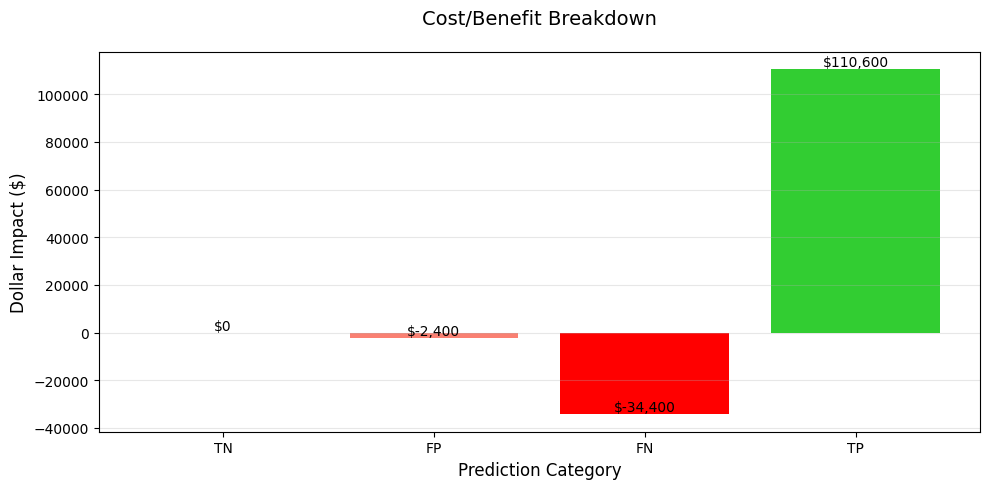


🔍 Cost Sensitivity at Different Thresholds:
At threshold 0.3: Cost = $93,850.00 (FP: 319, FN: 60)
At threshold 0.5: Cost = $73,800.00 (FP: 48, FN: 172)
At threshold 0.7: Cost = $-38,600.00 (FP: 4, FN: 554)


In [42]:
conf_matrix = confusion_matrix(y_test, y_pred)

cost_matrix = np.array([
    [0, -50],
    [-200, 100]
])

total_cost = np.sum(conf_matrix * cost_matrix)
cost_per_sample = total_cost / len(y_test)

print("\n💼 Business Impact Analysis (Using Imputed Data)")
print("═"*50)
print(f"▪ True Positives (TP): {conf_matrix[1,1]} - Safe water correctly identified")
print(f"▪ False Positives (FP): {conf_matrix[0,1]} - False alarms (clean water flagged as unsafe)")
print(f"▪ True Negatives (TN): {conf_matrix[0,0]} - Unsafe water correctly identified")
print(f"▪ False Negatives (FN): {conf_matrix[1,0]} - Missed detections (unsafe water labeled clean)")
print("─"*50)
print(f"💰 Total expected cost/benefit: ${total_cost:,.2f}")
print(f"📊 Cost/benefit per sample: ${cost_per_sample:,.2f}")
print("═"*50)

cost_breakdown = conf_matrix * cost_matrix
categories = ['TN', 'FP', 'FN', 'TP']
values = cost_breakdown.flatten()
colors = ['lightgreen', 'salmon', 'red', 'limegreen']

plt.figure(figsize=(10, 5))
bars = plt.bar(categories, values, color=colors)
plt.title('Cost/Benefit Breakdown', fontsize=14, pad=20)
plt.ylabel('Dollar Impact ($)', fontsize=12)
plt.xlabel('Prediction Category', fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🔍 Cost Sensitivity at Different Thresholds:")
thresholds_to_test = [0.3, 0.5, 0.7]
for thresh in thresholds_to_test:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    conf_matrix_thresh = confusion_matrix(y_test, y_pred_thresh)
    total_cost_thresh = np.sum(conf_matrix_thresh * cost_matrix)
    print(f"At threshold {thresh}: Cost = ${total_cost_thresh:,.2f} "
          f"(FP: {conf_matrix_thresh[0,1]}, FN: {conf_matrix_thresh[1,0]})")

### Threshold Optimization

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"\n🔎 Optimal Decision Threshold: {optimal_threshold:.3f}")

y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

print("\n🔍 Before vs After Threshold Optimization:")
print(f"Standard threshold (0.5):")
print(classification_report(y_test, y_pred, zero_division=0))
print(f"\nOptimal threshold ({optimal_threshold:.3f}):")
print(classification_report(y_test, y_pred_optimal, zero_division=0))


🔎 Optimal Decision Threshold: 0.480

🔍 Before vs After Threshold Optimization:
Standard threshold (0.5):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1998
           1       0.96      0.87      0.91      1278

    accuracy                           0.93      3276
   macro avg       0.94      0.92      0.93      3276
weighted avg       0.93      0.93      0.93      3276


Optimal threshold (0.480):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1998
           1       0.95      0.88      0.91      1278

    accuracy                           0.93      3276
   macro avg       0.94      0.92      0.93      3276
weighted avg       0.94      0.93      0.93      3276



### Feature Importance Analysis

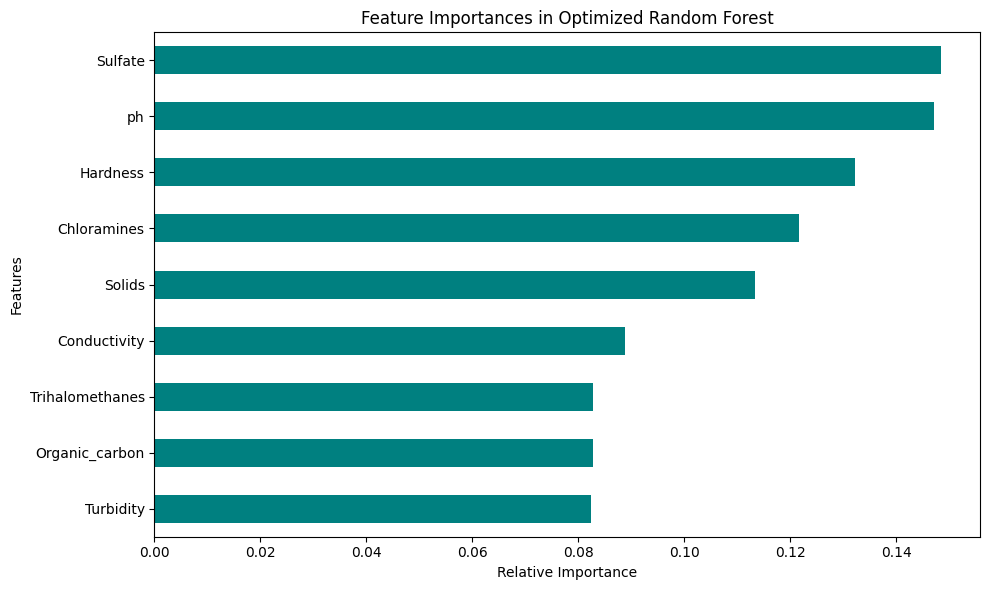

In [44]:
feature_importances = pd.Series(best_model.feature_importances_, index=X_test.columns)
plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importances in Optimized Random Forest')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

---

# Section 2

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

## Push Generated/new files from this section to your Github Repo

* Git add .

In [ ]:
!git add .

* Git commit

In [ ]:
!git commit -m "Added Model_Evaluation notebook"

* Git push

In [ ]:
!git push origin main